<a href="https://colab.research.google.com/github/SalmenzarZV/neural_zalando/blob/main/neural_zalando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# https://www.kaggle.com/datasets/zalando-research/fashionmnist
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# first neural network with keras tutorial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from keras.optimizers import Adam

from numpy import loadtxt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
display(np.unique(train_labels))
display(np.unique(test_labels))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

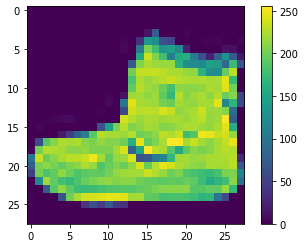

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

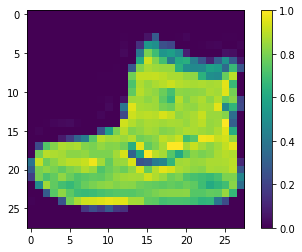

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

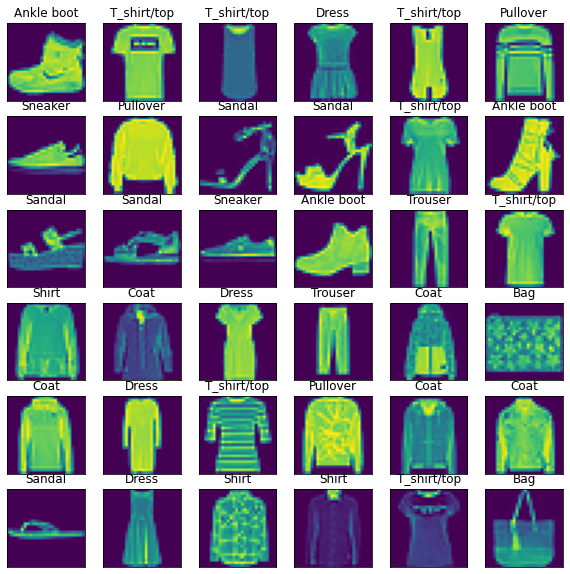

In [9]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

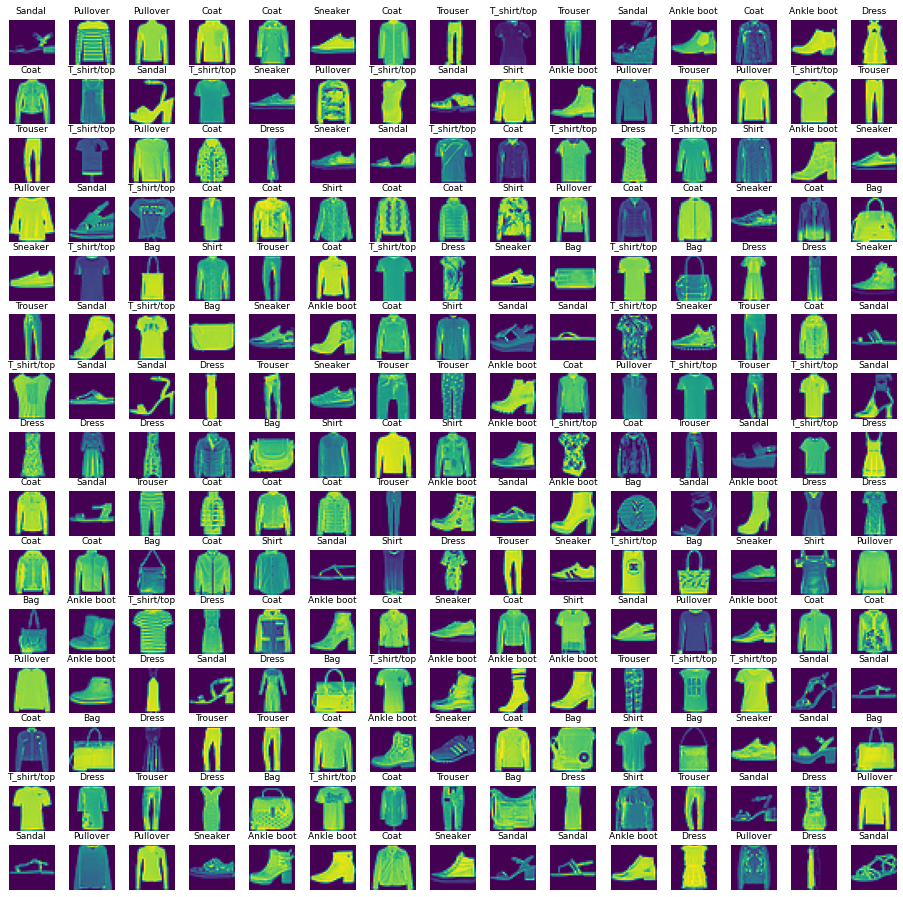

In [10]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_images) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_images[index].reshape((28,28)) )
    labelindex = int(train_labels[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [13]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [19]:
model = Sequential([
  layers.Flatten(input_shape=(train_images.shape[1], train_images.shape[2])),  # Convertir imagen en un vector unidimensional
  layers.Dense(128, activation='relu'), # Capa oculta con 128 neuronas
  layers.Dense(10)                      # Capa de salida con 10 neuronas correspondientes a las 10 clases de prendas
])

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=optimizer, metrics=['accuracy'])

In [20]:
history = model.fit(train_images,train_labels, epochs=250, batch_size=768, validation_data=(test_images, test_labels))

Epoch 1/250
79/79 [==============================] - 2s 15ms/step - loss: 22.0336 - accuracy: 0.6819 - val_loss: 7.6337 - val_accuracy: 0.7603
Epoch 2/250
79/79 [==============================] - 1s 14ms/step - loss: 5.8554 - accuracy: 0.7791 - val_loss: 6.5722 - val_accuracy: 0.7588
Epoch 3/250
79/79 [==============================] - 1s 13ms/step - loss: 4.4066 - accuracy: 0.7948 - val_loss: 4.1547 - val_accuracy: 0.7901
Epoch 4/250
79/79 [==============================] - 1s 13ms/step - loss: 3.2780 - accuracy: 0.8091 - val_loss: 3.6280 - val_accuracy: 0.7821
Epoch 5/250
79/79 [==============================] - 1s 14ms/step - loss: 2.7350 - accuracy: 0.8163 - val_loss: 3.0915 - val_accuracy: 0.7872
Epoch 6/250
79/79 [==============================] - 1s 13ms/step - loss: 2.4127 - accuracy: 0.8194 - val_loss: 2.5521 - val_accuracy: 0.8054
Epoch 7/250
79/79 [==============================] - 1s 19ms/step - loss: 1.9196 - accuracy: 0.8271 - val_loss: 2.2307 - val_accuracy: 0.8114
Epoch

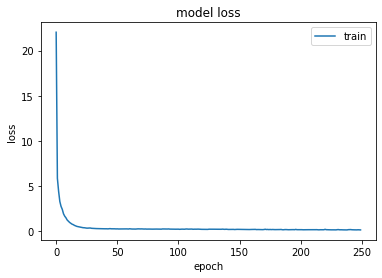

In [21]:
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

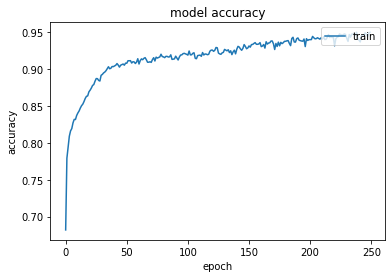

In [22]:
plt.plot(history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()